# 1. 데이터 로드하기

In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from konlpy.tag import Mecab

%matplotlib inline

In [2]:
train_data = pd.read_table('/aiffel/aiffel/project/nsmc-master/ratings_train.txt')
test_data = pd.read_table('/aiffel/aiffel/project/nsmc-master/ratings_test.txt')

max_len = 30 

In [3]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [5]:
print('train 데이터 개수 :', len(train_data))
print('test 데이터 개수 :', len(test_data))

train 데이터 개수 : 150000
test 데이터 개수 : 50000


# 2. 데이터 전처리하기

In [6]:
# 중복 제거
train_data.drop_duplicates('document', inplace=True)
test_data.drop_duplicates('document', inplace=True)

# 결측치 제거 - axis=0 NaN인 행을 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

In [7]:
print('train 데이터 개수 :', len(train_data))
print('test 데이터 개수 :', len(test_data))

train 데이터 개수 : 146182
test 데이터 개수 : 49157


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


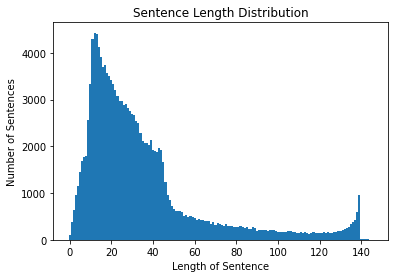

In [8]:
# train_data에서 'document' 열의 내용을 리스트로 변환
raw = train_data['document'].tolist()

# 초기 설정
min_len = 999
max_len = 0
sum_len = 0

# 문장의 최단, 최장, 평균 길이 계산
for sen in raw:
    length = len(str(sen))
    if min_len > length: 
        min_len = length
    if max_len < length: 
        max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

# 각 길이별 문장의 개수 계산
sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    length = len(str(sen))
    sentence_length[length-1] += 1

# 시각화
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.xlabel('Length of Sentence')
plt.ylabel('Number of Sentences')
plt.show()


길이가 140이 넘는 문장들도 존재를 한다.

In [9]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 140)

데너리스 타르 가르엔...나도 용의주인이 되고 싶다...누이랑,근친상간이나 하고 다닐지라도,소설 속에선 제일 멋진 놈이 자이메 라니스터였는데,드라마속에선,드래곤(용)이 제일 멋지네(웃음)감독님 토르-2 다크 월드는 말아 잡수셨을지라도,기본 선방은 했음
아~ 진짜 조금만 더 손 좀 보면 왠만한 상업 영화 못지 않게 퀄리티 쩔게 만들어 질 수 있었는데 아쉽네요 그래도 충분히 재미있었습니다 개인적으로 조금만 더 잔인하게 더 자극적으로 노출씬도 화끈하게 했더라면 어땠을까 하는 국산영화라 많이 아낀 듯 보임
평점조절위원회에서 나왔습니다(웃음)김혜선은 @내일이 오면@의 김순정,순정이 역할이 제일이다.팜므파탈로써,그 정도까지 잘해낼 줄은,정말 의외였어...연기20년 한사람에게 요즘 사극에서 벌어지고 있는,그녀에 대한 연기논란은 왠지 코미디의한장면 같음(웃음)
사실여부를 떠나,알고왔던 아더와 너무 매칭이 안돼더라.원탁기사중 실제 검술 최고수는 랜슬롯으로 알고 있는데,트리스탄보다 못하고,싸우는 검술은 마치 중국검술 흉내낸거 같은게;; 그리고 란슬롯이 실제는 쌍검였나?너무 매칭이 안대 하튼 ㅋ기네비어역도 미스.
진짜 이건 아님ㅋㅋㅋㅋㅋ액션영화좋아해서 액션영화만 다운받아서 꾸준히 본게 벌써 몇년인 사람임 근데 이건 진짴ㅋㅋㅋㅋㅋㅋ아무리 점수 잘 줘도 100점 만점에 10점?ㅡㅡ돈주고봤는데너무아깝다진짜ㅜㅜ그리고대체 왜 13구역 타이틀을 달고나왔는지 모르겠음 실망
영화'산업'이라고 하잖는가? 이딴식으로 홍보 해놓고 속여서 팔았다는 게 소비자 입장에서는 짜증난다. 그나마 다행은 아주 싸구려를 상급품으로 속여판 게 아니라는 점. 그래서 1점. 차라리 연상호 감독 작품 처럼 홍보가 됐다면, 그 비슷하게 만이라도 하지
화려한 색채때문에 눈이 아프지만 그 나름대로 화려연예계여자욕망에대해 표현해냈던거같다 보는내내 진짜 리리코심정가진 연옌들도 있을거같고..나를한번도보지못하고알지못하는사람들이날어떻게사랑하냐그런대사 나왔을때 소름돋더라 연예인들은 많은사랑받으면서도 참 허전할듯
히가시노 게이고의 추리소

In [10]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 7
Outlier Index: 8
Outlier Index: 9
Outlier Index: 10
Outlier Index: 11
Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18
Outlier Index: 19
Outlier Index: 20
Outlier Index: 21
Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28
Outlier Index: 29
Outlier Index: 30
Outlier Index: 31
Outlier Index: 32
Outlier Index: 33
Outlier Index: 34
Outlier Index: 35
Outlier Index: 36
Outlier Index: 37
Outlier Index: 38
Outlier Index: 39
Outlier Index: 40
Outlier Index: 41
Outlier Index: 42
Outlier Index: 43
Outlier Index: 44
Outlier Index: 45
Outlier Index: 46


In [11]:
check_sentence_with_length(raw, 7)

별루 였다..
별점10점가자
감동적인 영화
고다미 괜찮음
걍 둘다 변태
10점 만들기
요즘 재밌음!
할 말이 없다
General
존내재밋습네다
원작 망쳤네요
아씨 울었다.
완전 별로네요
재미없다...
제목이 멋지다
아름다운 영화
완점잼~!!!
웃기고 재밌다
재미없을거같음
으~~최악이다
좆잡고반성해라
개봉 했나요?
청국장!!!!
짱개같은 영화
이거 영화야?
진짜 인생최악
맨땅에 시청률
감동의 전율☆
정말 재미없음
좋다. 봐라.
배우들이아깝다
일베에서 왔다
최고멋짐 !!
괜찮게 봤음.
아니 말좀해라
황홀한 영화~
너무 재미있음
1편이 낫다.
빅뱅 사랑한다
그럭저럭임..
생각보다 별로
다 똑 같 애
너무 난해하다
이중이 김소연
제목이 뭐이래
참 감동적이넴
난 재밋게봤음
잼있어요...
여름공식드라마
지저분 공포.
...미치겠다
1점도 아까움
졸라 지루하다
진리의 유동근
평점이너무높다
넌센스다...
.......
잘 자고 왓음
중국이OOO지
볼만하네용 ㅎ
느낌좋은 영화
쯧쯧...;;
4.44 가자
별로였음...
괜히본듯 ㅠㅠ
지루함의 극치
제목부터가..
진국 시나리오
코미디 맞냐?
말이 필요없는
별로 재미없음
십점만점에십점
배교수님 짱!
존나게 슬프다
이제 그만..
볼만한 공중전
잘 봤습니다.
1점도 아깝다
짜증나서...
괜찮았음...
힘들다 보기가
재미하나도없다
이정시러...
정말끝내줬어!
코리안 느와르
너무 재미없다
띠띠디디띠띠~
평점조절위원회
재미없다삐리뽕
수고하셨습니다
그럭저럭...
잼 없음...
재 미 없 다
말이필요없어!
점수 올라가라
환타스틱 하네
어휴.....
디질레.ㅡㅡ+
최고의 드라마
기분 더럽다.
1명 참여..


중복되는게 있는지 하나하나 확인해봤지만 찾질 못했다. 혹시 모르니 중복도 제거해준다.

Data Size: 146182
문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


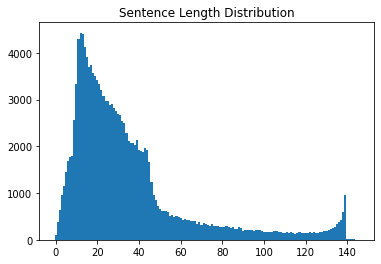

In [12]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적이므로 최대길이 100이 넘는 데이터들을 제거한다.

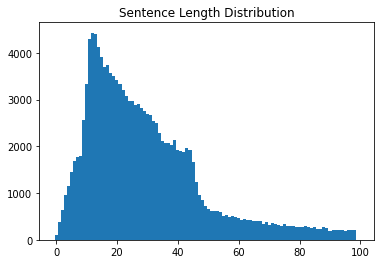

In [13]:
max_len = 100
min_len = 0

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

#  토큰화 진행(Sentencepiece 모델 학습)

In [14]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행
        f.write(str(row) + '\n')

#unigram
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=naver_review_spm_unigram --vocab_size={}'.format(temp_file, vocab_size)    
)#unigram이 디폴트로 적용됌
# bpe
spm.SentencePieceTrainer.Train(
    '--input={} --model_type=bpe --model_prefix=naver_review_spm_bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l naver_review_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=naver_review_spm_unigram --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: naver_review_spm_unigram
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1

-rw-r--r-- 1 root root 370578 Dec 27 06:17 naver_review_spm_bpe.model
-rw-r--r-- 1 root root 115774 Dec 27 06:17 naver_review_spm_bpe.vocab
-rw-r--r-- 1 root root 375206 Dec 27 06:16 naver_review_spm_unigram.model
-rw-r--r-- 1 root root 144618 Dec 27 06:16 naver_review_spm_unigram.vocab


## Unigram

In [40]:
s_uni = spm.SentencePieceProcessor() 
s_uni.Load('naver_review_spm_unigram.model')


tokensIDs = s_uni.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)


print(s_uni.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))


print(s_uni.DecodeIds(tokensIDs))

[1529, 9, 404, 15, 1376, 9, 137, 17, 4]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## BPE

In [41]:
s_bpe = spm.SentencePieceProcessor() 
s_bpe.Load('naver_review_spm_bpe.model')


tokensIDs = s_bpe.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)


print(s_bpe.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))


print(s_bpe.DecodeIds(tokensIDs))

[5158, 916, 6550, 6284, 1470, 6280, 6387, 6274, 6272]
['▁아버', '지가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


# 학습된 Unigram과 BPE를 

## Unigram

In [42]:
def sp_tokenize_uni(s_uni, corpus, model_prefix):

    tensor = []

    for sen in corpus:
        tensor.append(s_uni.EncodeAsIds(sen))

    with open(f'./{model_prefix}.vocab', 'r') as f: # unigram 타입 vocab
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)

    return tensor, word_index, index_word

In [45]:
test_corpus = ['아버지가 방에 들어가신다.', '그래서 나는 치킨을 시켜먹었다']
tensor_uni, word_index_uni, index_word_uni = sp_tokenize_uni(s_uni, test_corpus, 'naver_review_spm_unigram')

print(tensor_uni)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 1529    9 1245   15 4190  137
    17    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1113  571  995

In [46]:
print(tensor_uni.shape)

(2, 100)


## BPE

In [49]:
def sp_tokenize_bpe(s_bpe, corpus, model_prefix):

    tensor = []

    for sen in corpus:
        tensor.append(s_bpe.EncodeAsIds(sen))

    with open(f'./{model_prefix}.vocab', 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen = 100)

    return tensor, word_index, index_word

In [50]:
test_corpus = ['아버지가 방에 들어가신다.', '그래서 나는 치킨을 시켜먹었다']
tensor_bpe, word_index_bpe, index_word_bpe = sp_tokenize_bpe(s_bpe, test_corpus, 'naver_review_spm_bpe')

print(tensor_bpe)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 5158  916  481 6284 1079 6280 6387
  6274 6272]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1289  724  598

In [51]:
print(tensor_bpe.shape)

(2, 100)


In [52]:
from sklearn.model_selection import train_test_split

def split_train_test(tensor, labels):
    x_train, x_temp, y_train, y_temp = train_test_split(tensor, labels, test_size=0.2, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

# Unigram
tensor_uni, word_index_uni, index_word_uni = sp_tokenize_uni(s_uni, train_data['document'], 'naver_review_spm_unigram')
x_train_uni, x_val_uni, x_test_uni, y_train_uni, y_val_uni, y_test_uni = split_train_test(tensor_uni, train_data['label'])

# BPE
tensor_bpe, word_index_bpe, index_word_bpe = sp_tokenize_bpe(s_bpe, train_data['document'], 'naver_review_spm_bpe')
x_train_bpe, x_val_bpe, x_test_bpe, y_train_bpe, y_val_bpe, y_test_bpe = split_train_test(tensor_bpe, train_data['label'])



In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# LSTM 모델 정의
def lstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(word_index_uni) + 1, output_dim=64, input_length=input_shape), 
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(16),
        tf.keras.layers.Dense(16, activation='relu'), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = lstm_model(x_train_uni.shape[1])


model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          1024128   
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 64)           49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,087,041
Trainable params: 1,087,041
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Unigram 학습
model_uni = lstm_model(x_train_uni.shape[1])
history_uni = model_uni.fit(x_train_uni, y_train_uni, validation_data=(x_val_uni, y_val_uni), epochs=10, batch_size=32)

Epoch 1/10
3655/3655 [==============================] - 36s 9ms/step - loss: 0.3799 - accuracy: 0.8265 - val_loss: 0.3295 - val_accuracy: 0.8550
Epoch 2/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.2880 - accuracy: 0.8769 - val_loss: 0.3234 - val_accuracy: 0.8577
Epoch 3/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.2482 - accuracy: 0.8957 - val_loss: 0.3267 - val_accuracy: 0.8589
Epoch 4/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.2117 - accuracy: 0.9125 - val_loss: 0.3467 - val_accuracy: 0.8583
Epoch 5/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1748 - accuracy: 0.9302 - val_loss: 0.3892 - val_accuracy: 0.8526
Epoch 6/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1413 - accuracy: 0.9456 - val_loss: 0.4249 - val_accuracy: 0.8466
Epoch 7/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1111 - accuracy: 0.9578 - val_loss: 0.4989 - val_ac

In [76]:
# BPE 학습
model_bpe = lstm_model(x_train_bpe.shape[1])
history_bpe = model_bpe.fit(x_train_bpe, y_train_bpe, validation_data=(x_val_bpe, y_val_bpe), epochs=10, batch_size=32)

Epoch 1/10
3655/3655 [==============================] - 37s 9ms/step - loss: 0.3778 - accuracy: 0.8287 - val_loss: 0.3333 - val_accuracy: 0.8553
Epoch 2/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.2890 - accuracy: 0.8757 - val_loss: 0.3216 - val_accuracy: 0.8596
Epoch 3/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.2494 - accuracy: 0.8953 - val_loss: 0.3375 - val_accuracy: 0.8614
Epoch 4/10
3655/3655 [==============================] - 34s 9ms/step - loss: 0.2122 - accuracy: 0.9137 - val_loss: 0.3599 - val_accuracy: 0.8583
Epoch 5/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1740 - accuracy: 0.9303 - val_loss: 0.3905 - val_accuracy: 0.8548
Epoch 6/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1375 - accuracy: 0.9468 - val_loss: 0.4346 - val_accuracy: 0.8488
Epoch 7/10
3655/3655 [==============================] - 33s 9ms/step - loss: 0.1073 - accuracy: 0.9589 - val_loss: 0.4894 - val_ac

In [79]:
acc_uni = history_uni.history['accuracy']
val_acc_uni = history_uni.history['val_accuracy']
acc_bpe = history_bpe.history['accuracy']
val_acc_bpe = history_bpe.history['val_accuracy']

epochs = range(1, len(acc_uni) + 1)

In [82]:
# Unigram 평가
loss_uni, accuracy_uni = model_uni.evaluate(x_test_uni, y_test_uni, verbose=0)
print(f"Unigram - Loss: {loss_uni:.4f}, Accuracy: {accuracy_uni*100:.2f}%")

# BPE 평가
loss_bpe, accuracy_bpe = model_bpe.evaluate(x_test_bpe, y_test_bpe, verbose=0)
print(f"BPE - Loss: {loss_bpe:.4f}, Accuracy: {accuracy_bpe*100:.2f}%")



Unigram - Loss: 0.7079, Accuracy: 84.15%
BPE - Loss: 0.7126, Accuracy: 83.84%


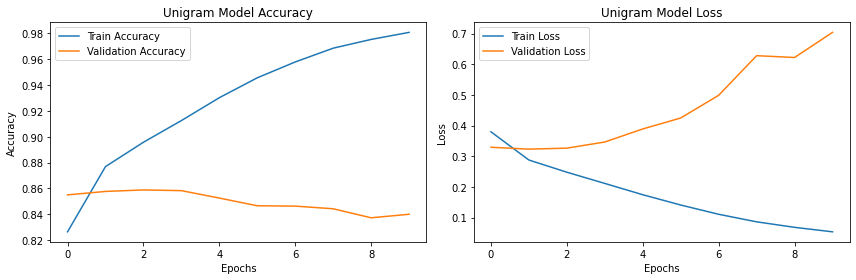

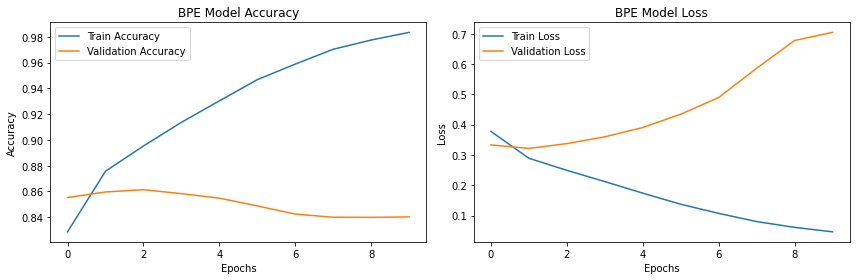

In [85]:
# 결과 시각화
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_uni, 'Unigram')
plot_history(history_bpe, 'BPE')

# KoNLPy 형태소 분석기를 사용한 모델 성능 비교

In [90]:
import numpy as np
import tensorflow as tf
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Mecab tokenizer 및 불용어 리스트 설정
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 데이터 로딩 및 전처리 함수
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how='any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how='any')
    
    X_train, X_test = [], []
    
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if word not in stopwords]
        X_train.append(temp_X)
    
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if word not in stopwords]
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words - 4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word: index for index, word in enumerate(vocab)}
    
    X_train = list(map(lambda x: [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in x], X_train))
    X_test = list(map(lambda x: [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in x], X_test))
    
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index


In [ ]:
# 데이터 로딩
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

# 인덱스와 단어를 역으로 매핑하는 딕셔너리 생성
index_to_word = {index: word for word, index in word_to_index.items()}


## 회고

지속적으로 연결이 끊키고 이해하는데에 어려움이 많아 끝까지 결과를 내지 못했다. 특히 KoNLPy에 있는 형태소로 모델을 만드는 부분에서 이해하는데에 시간이 걸려서 조금 더 공부가 필요할 거 같다. 